# Análisis exploratorio de incidencia delictiva en México

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/delitos.csv')

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

       fecha           entidad  frecuencia
0 2015-01-01  Ciudad de México       101.0
1 2015-01-01           Jalisco       150.0
2 2015-02-01  Ciudad de México       148.0
3 2015-02-01           Jalisco       133.0
4 2015-03-01  Ciudad de México       130.0
(110, 3)


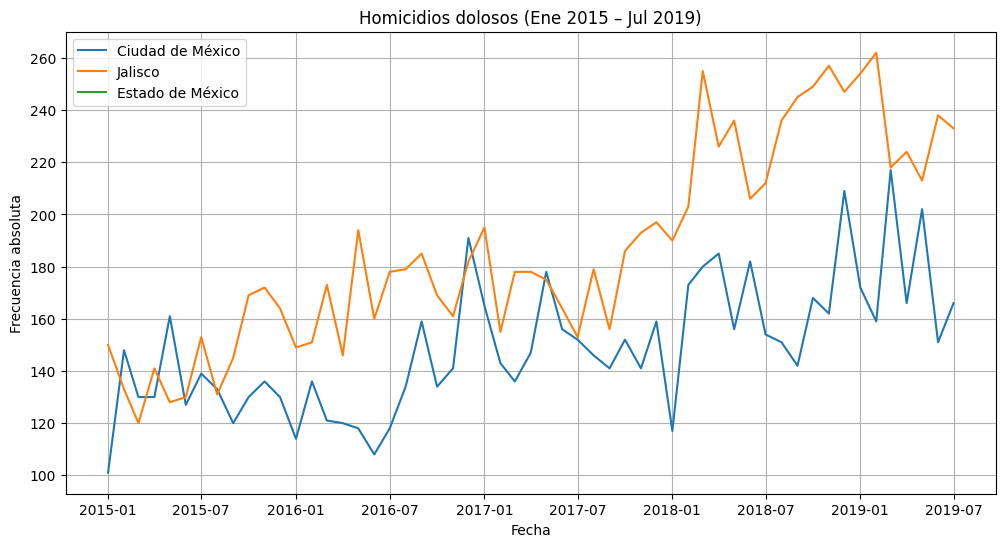

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Estados
estados = ['Ciudad de México', 'Jalisco', 'Estado de México']

# Filtrar homicidios dolosos (contiene la palabra)
df_hom = df[df['tipo_de_delito'].str.contains('Homicidio', case=False, na=False)]

# Filtrar estados
df_hom = df_hom[df_hom['entidad'].isin(estados)]

# Convertir fecha
df_hom['fecha'] = pd.to_datetime(df_hom['fecha'])

# Filtrar periodo
df_hom = df_hom[
    (df_hom['fecha'] >= '2015-01-01') &
    (df_hom['fecha'] <= '2019-07-31')
]

# Agrupar
df_grouped = (
    df_hom
    .groupby(['fecha', 'entidad'])['frecuencia']
    .sum()
    .reset_index()
)

# Verificación (opcional pero recomendada)
print(df_grouped.head())
print(df_grouped.shape)

# Gráfica
plt.figure(figsize=(12,6))

for estado in estados:
    data = df_grouped[df_grouped['entidad'] == estado]
    plt.plot(data['fecha'], data['frecuencia'], label=estado)

plt.title('Homicidios dolosos (Ene 2015 – Jul 2019)')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia absoluta')
plt.legend()
plt.grid(True)
plt.show()




In [7]:
df[
    (df['entidad'] == 'Colima') &
    (df['anio'] == 2018) &
    (df['tipo_de_delito'].str.contains('Homicidio', case=False))
]['frecuencia'].sum()
df[
    (df['entidad'] == 'Colima') &
    (df['anio'] == 2018) &
    (df['tipo_de_delito'].str.contains('Homicidio', case=False))
]['frecuencia'].sum()
df[
    df['tipo_de_delito'].str.contains('Homicidio|Feminicidio', case=False)
].groupby('anio')['frecuencia'].sum()
df_fem = df[df['tipo_de_delito'].str.contains('Feminicidio', case=False)]

df_fem.sort_values('frecuencia', ascending=False).head(1)
df_fem.groupby(['anio', 'entidad'])['frecuencia'] \
      .sum() \
      .reset_index() \
      .sort_values('frecuencia', ascending=False) \
      .head(1)


,anio,entidad,frecuencia
176,2020,México,151.0


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

/var/folders/j2/wvgt2hsj7sgbzj1znyqvb2m00000gn/T/ipykernel_68279/2611653660.py:42: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


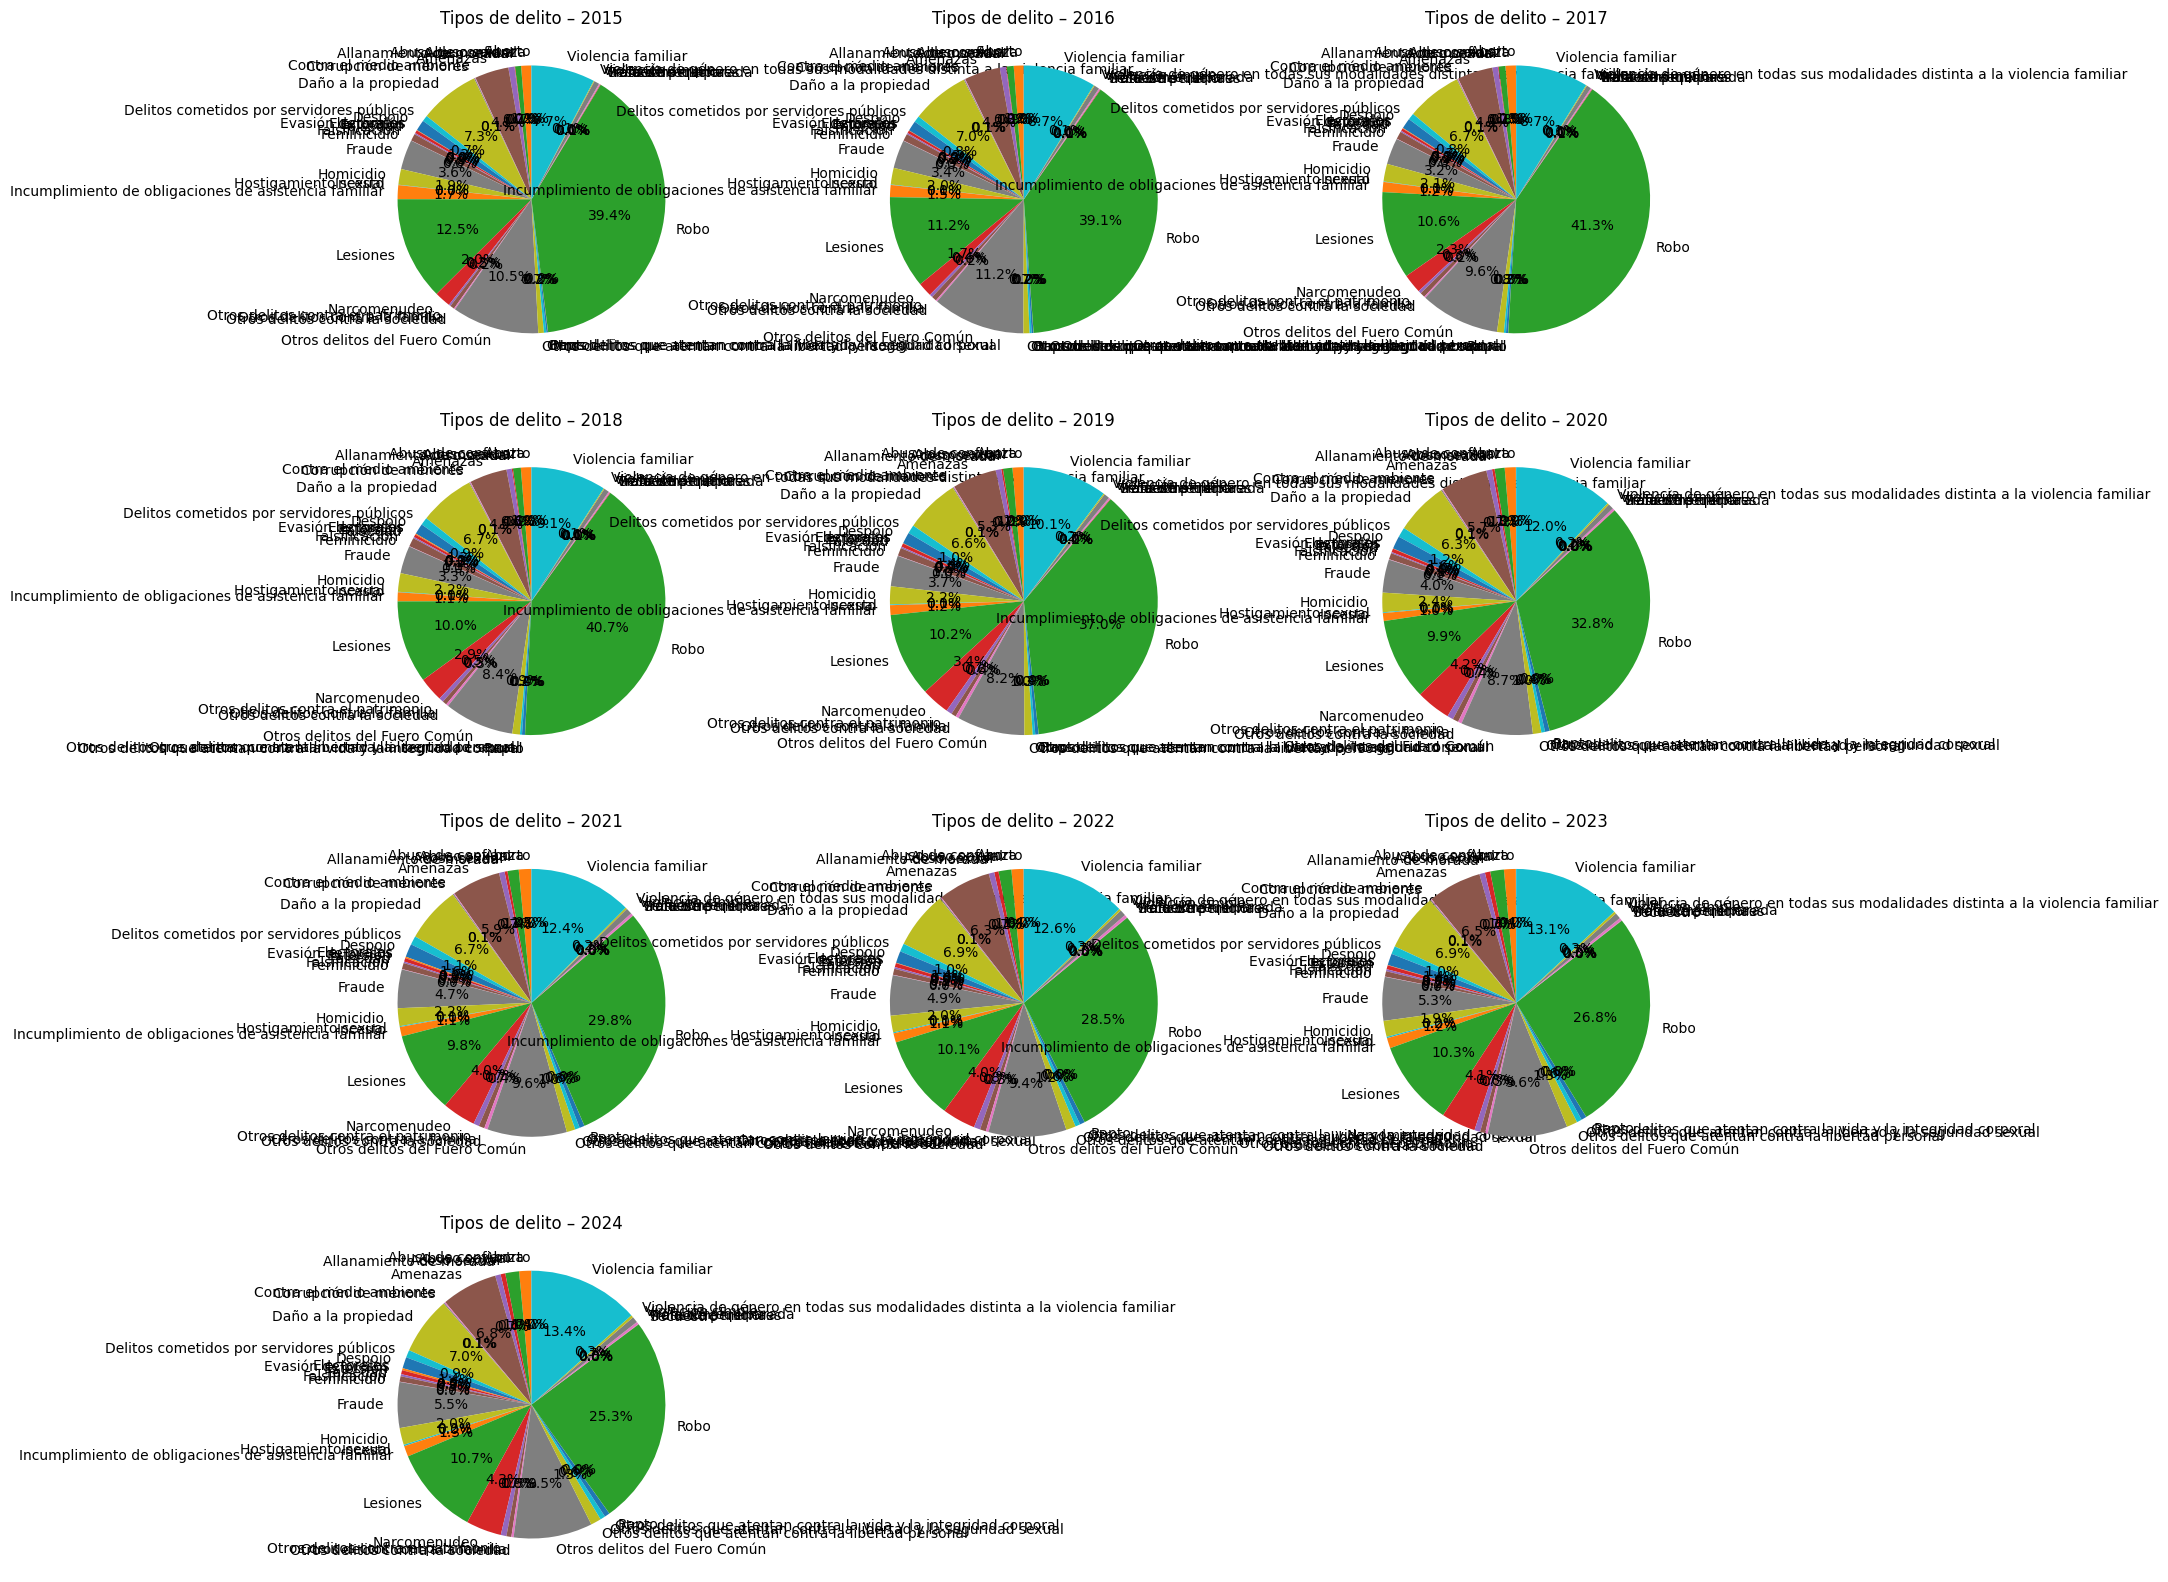

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Asegurar que el año sea entero
df['anio'] = df['anio'].astype(int)

# Agrupar por año y tipo de delito
df_grouped = (
    df.groupby(['anio', 'tipo_de_delito'])['frecuencia']
    .sum()
    .reset_index()
)

# Años disponibles
anios = sorted(df_grouped['anio'].unique())

# Definir grid de subplots
n = len(anios)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

# Crear un pastel por cada año
for i, anio in enumerate(anios):
    data = df_grouped[df_grouped['anio'] == anio]
    
    axes[i].pie(
        data['frecuencia'],
        labels=data['tipo_de_delito'],
        autopct='%1.1f%%',
        startangle=90
    )
    axes[i].set_title(f'Tipos de delito – {anio}')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [9]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

,clave_entidad,entidad,poblacion
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0
